# Εργασία 1


Ονοματεπώνυμο: Καρλάκη Μαρία ΑΕΜ:244

#Ερώτημα 1

# Εισαγωγή Βιβλιοθηκών

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso


# Φόρτωση δεδομένων

In [96]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Στατιστικά δεδομένα

In [97]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Δημιουργία ιστογραμμάτων για κάθε χαρακτηριστικό

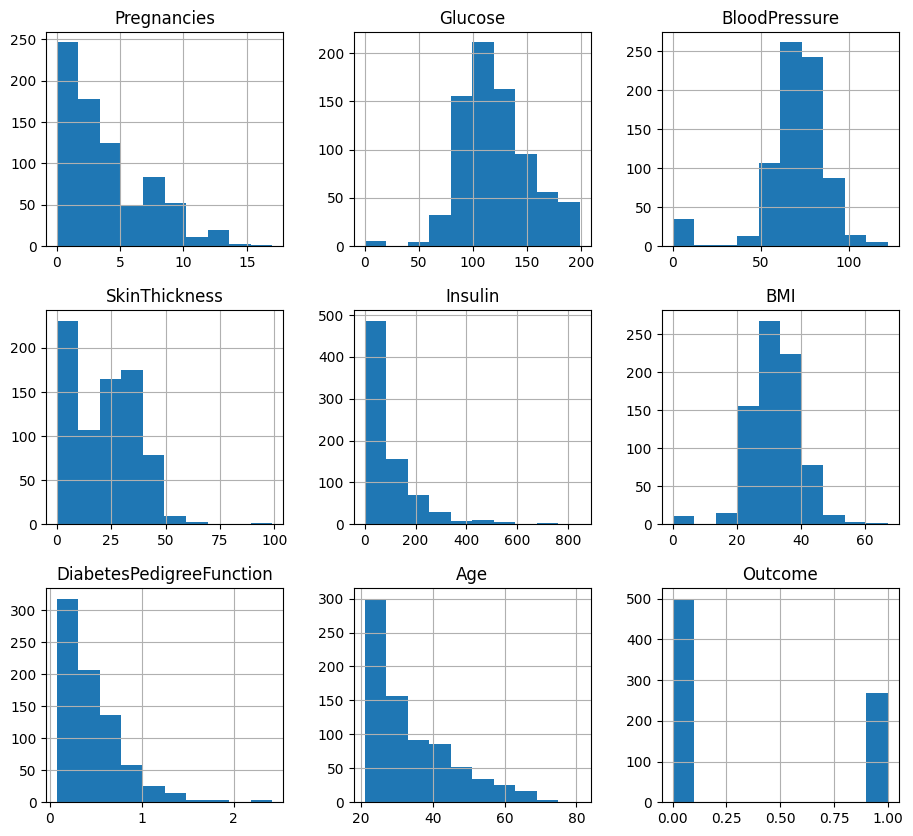

In [98]:
df.hist(figsize=(11, 10))
plt.show()

# Ραβδόγραμμα (Bar Plot) του Outcome

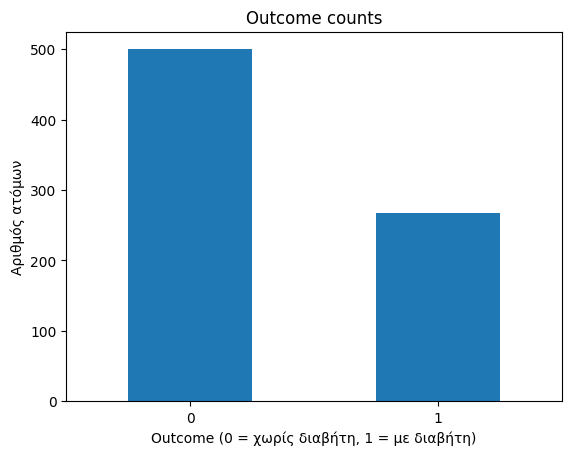

In [99]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Outcome counts')
plt.xlabel('Outcome (0 = χωρίς διαβήτη, 1 = με διαβήτη)')
plt.ylabel('Αριθμός ατόμων')
plt.xticks(rotation=0)
plt.show()

# Ερώτημα 2 - Αξιολόγηση ποιότητας δεδομένων

 Σύμφωνα με τον σταστιτικό πίνακα παρατηρούνται μηδενικές τιμές, κάτι που δεν είναι λογικό για τέτοια ιατρικά δεδομένα. Πιο συγκεκριμένα δεν γίνεται ένας ασθενής να έχει μηδενική συγκέντρωση γλυκόζης ή πίεση αίματος. Το γεγονός αυτό δείχνει είτε οτι έχει γίνει λανθασμένη καταγραφή δεδομένων είτε ελλείψεις στις μετρήσεις. Συνεπώς πρέπει να γίνει προεπεξεργασία ή αντικατάσταση αυτών των τιμών με τις αντίστοιχες κατάλληλες, καθώς μπορεί να οδηγήσουν σε λανθασμένα συμπεράσματα κατά την εκπαίδευση του μοντέλου.

Ακόμη η κατανομή των τιμών σε αρκετά χαρακτηριστικά δεν είναι ισορροπημένη και φαίνεται και στα ιστογράμματα. Ιδιαίτερα στο χαρακτηριστικό Outcome (0: Αρνητικός, 1: Θετικός) παρατηρείται ανισορροπία, καθώς η πλειονότητα των εγγραφών αντιστοιχεί σε άτομα χωρίς διαβήτη. Αυτή η ανισοκατανομή μπορεί να επηρεάσει την απόδοση του μοντέλου ταξινόμησης, αφού υπάρχει κίνδυνος το μοντέλο να μάθει να προβλέπει κυρίως την κατηγορία με τα περισσότερα δείγματα, μειώνοντας έτσι την ακρίβεια για τις περιπτώσεις διαβητικών ασθενών.

Συνεπώς η ποιότητα των δεδομένων θεωρείται κακή, καθώς οι μηδενικές τιμές και η ανισορροπία στις κατηγορίες μπορεί να οδηγήσουν σε προβλήματα κατά την εκπαίδευση του μοντέλου και πρέπει οπωσδήποτε να ληφθούν υπόψη κατά την προεπεξεργασία.

# Ερώτημα 3 - Κατανομή της ηλικίας (Age)

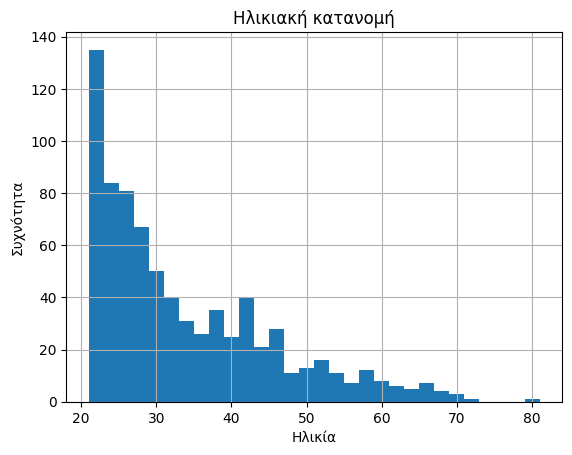

In [100]:
df['Age'].hist(bins=30)
plt.title('Ηλικιακή κατανομή')
plt.xlabel('Ηλικία')
plt.ylabel('Συχνότητα')
plt.show()

Η μεταβλητή Age ακολουθεί μια δεξιά ασύμμετρη (right-skewed) ή αλλιώς εκθετική κατανομή, καθώς η συχνότητα είναι πολύ υψηλή για τις μικρότερες ηλικίες και μειώνεται σταδιακά όσο η ηλικία αυξάνεται. Παρότι η εκθετική κατανομή περιγράφει σωστά το σχήμα των δεδομένων, δεν θεωρείται ιδανική για τη συγκεκριμένη εφαρμογή, γιατί οι ηλικιωμένοι δεν εκπροσωπούνται επαρκώς. Έτσι το μοντέλο μπορεί να εκπαιδευτεί κυρίως από τους νεότερους και να μην αποδίδει καλά όταν καλείται να κάνει προβλέψεις για μεγαλύτερα άτομα. Για να βελτιωθεί η ποιότητα του μοντέλου θα ήταν χρήσιμο να εμπλουτιστεί το δείγμα με περισσότερα δεδομένα, ώστε η κατανομή να γίνει πιο ισορροπημένη.

# Ερώτημα 4 - Σχέση γλυκόζης και διαβήτη

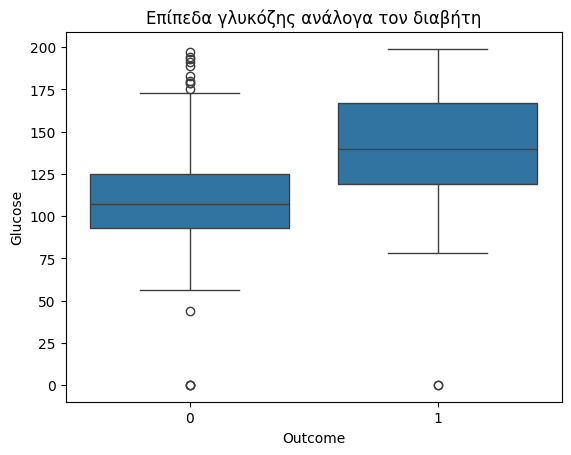

In [105]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Επίπεδα γλυκόζης ανάλογα τον διαβήτη')
plt.show()

Μέση τιμή της γλυκόζης για τις δύο κατηγορίες:

In [102]:
mean_glucose_diabetes = df.groupby('Outcome')['Glucose'].mean()
print(mean_glucose_diabetes)

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


Από την ανάλυση προκύπτει ότι οι ασθενείς με διαβήτη (Outcome = 1) έχουν μέση τιμή γλυκόζης 141.26 mg/dl, ενώ όσοι δεν έχουν διαβήτη (Outcome = 0) έχουν μέση τιμή 109.98 mg/dl. Το boxplot επίσης έδειξε ότι οι τιμές τις γλυκόζης είναι υψηλότερες στην ομάδα με διαβήτη, επιβεβαιώνοντας την κλινική μελέτη.

#Ερώτημα 5 - Δημιουργία Numpy Arrays

In [103]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']
x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

Χωρισμός σε train και test set (70-30%)

In [58]:
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

# Ερώτημα 6 - Δημιουργία & Εκπαίδευση Logistic Regression

In [106]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Προβλέψεις

In [107]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

Υπολογισμός ακρίβειας

In [108]:
train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 2)
test_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)
print(f'Η ακρίβεια του μοντέλου στο train set είναι: {train_accuracy}%')
print(f'Η ακρίβεια του μοντέλου στο test set είναι: {test_accuracy}%')

Η ακρίβεια του μοντέλου στο train set είναι: 76.54%
Η ακρίβεια του μοντέλου στο test set είναι: 77.92%


Ερμηνεία

Οι πολύ κοντινές τιμές ακρίβειας στα train και test set δείχνουν ότι το μοντέλο κάνει καλή γενίνευση, έχει σταθερή απόδοση και δεν παρουσιάζει υπερπροσαρμογή.

# Ερώτημα 7 - Αξιολόγηση της ακρίβειας του ταξινομητή ανά ηλικιακή ομάδα

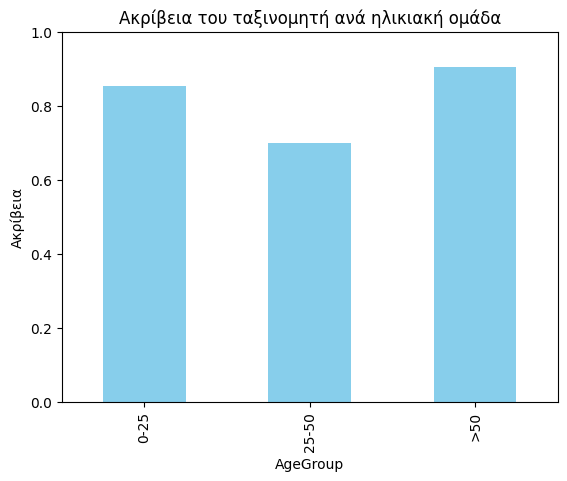

AgeGroup
0-25     0.855556
25-50    0.700000
>50      0.904762
dtype: float64


In [109]:
df_test = pd.DataFrame(x_test, columns=input_df.columns)
df_test['True'] = y_test
df_test['Pred'] = y_test_pred

age_groups = pd.cut(df_test['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '>50'])
df_test['AgeGroup'] = age_groups

accuracy_per_age = (
    df_test.groupby('AgeGroup', observed=True)[['True', 'Pred']]
    .apply(lambda g: accuracy_score(g['True'], g['Pred']))
)

accuracy_per_age.plot(kind='bar', color='skyblue')
plt.title('Ακρίβεια του ταξινομητή ανά ηλικιακή ομάδα')
plt.ylabel('Ακρίβεια')
plt.ylim(0, 1)
plt.show()

print(accuracy_per_age)

Ερμηνεία:

Το μοντέλο αποδίδει καλύτερα στις ηλικιακές ομάδες 0-25 και άνω των 50 ετών, με ακρίβεια 86% και 90% αντίστοιχα, ενώ η απόδοσή του μειώνεται στη μεσαία ομάδα 25-50 ετών (70%).

# Ερώτημα 8 - Αξιολόγηση των λανθασμένων προβλέψεων

Αν το μοντέλο προβλέψει λανθασμένα ότι ένας ασθενής έχει διαβήτη ενώ δεν έχει, μπορεί να προκαλέσει άγχος και να οδηγήσει σε περιττές εξετάσεις χωρίς όμως σοβαρές συνέπειες. Αντίθετα αν προβλέψει ότι κάποιος δεν έχει διαβήτη ενώ στην πραγματικότητα έχει, το σφάλμα είναι πολύ πιο επικίνδυνο, καθώς ο ασθενής δεν θα έχει λάβει την απαραίτητη αγωγή με αποτέλεσμα να αυξηθεί ο κίνδυνος σοβαρών επιπλοκών, όπως καρδιαγγειακά νοσήματα. Συνεπώς είναι προτιμότερο να υπάρχουν ορισμένα ψευδώς θετικά αποτελέσματα, ώστε να αποφευχθεί ο κίνδυνος των σοβαρών επιπτώσεων που προκαλούνται από τη μη έγκαιρη διάγνωση του.

# Ερώτημα 9 - Επαναλήψεις με διαφορετικά seeds

In [110]:
accuracies = []

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(random_state=seed, max_iter=2000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Ακρίβειες: {accuracies}")

Ακρίβειες: [0.7792207792207793, 0.7835497835497836, 0.7489177489177489, 0.7575757575757576, 0.8138528138528138, 0.7878787878787878, 0.7662337662337663, 0.7748917748917749, 0.7792207792207793, 0.7445887445887446]


Υπολογισμός μέσου όρου και τυπικής απόκλισης

In [111]:
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Μέση ακρίβεια: {mean_accuracy}, Τυπική απόκλιση: {std_accuracy}")

Μέση ακρίβεια: 0.7735930735930736, Τυπική απόκλιση: 0.019364735278220815


Παρατηρείται ότι το μοντέλο επιτυγχάνει ικανοποιητική απόδοση, με μέση ακρίβεια περίπου 77%. Η πολύ χαμηλή τυπική απόκλιση των αποτελεσμάτων σε δέκα διαφορετικές εκδοχές δείχνει ότι η απόδοσή του είναι σταθερή και αξιόπιστη, ανεξάρτητα από τη τυχαιοποίηση των δεδομένων.

#Ερώτημα 10 - Εφαρμογή Min Max κανονικοποίησης

In [112]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_scaled, y)
coefficients = pd.Series(model.coef_[0], index=input_df.columns)

features = coefficients.abs().sort_values(ascending=False)

print("Σημαντικότητα χαρακτηριστικών:")
print(features)

Σημαντικότητα χαρακτηριστικών:
Glucose                     4.856010
BMI                         3.261590
Pregnancies                 1.554917
DiabetesPedigreeFunction    1.506648
Age                         0.978712
BloodPressure               0.749140
SkinThickness               0.194376
Insulin                     0.122658
dtype: float64


 Οπτική αναπαράσταση

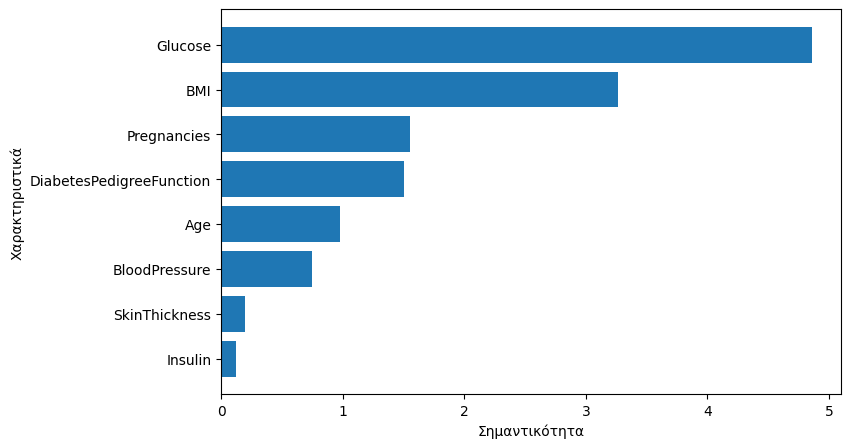

In [113]:
plt.figure(figsize=(8,5))
plt.barh(features.index, features.values)
plt.xlabel('Σημαντικότητα')
plt.ylabel('Χαρακτηριστικά')
plt.gca().invert_yaxis()
plt.show()

Συνεπώς προκύπτει οτι μετά την κανονικοποίηση των δεδομένων και την εκπαίδευση του μοντέλου, οτι οι σημαντικότεροι παράγοντες που επηρεάζουν την πρόβλεψη του διαβήτη είναι η γλυκόζη, ο δείκτης μάζας σώματος και η εγκυμοσύνη, με τη γλυκόζη να αποτελεί τον ισχυρότερο δείκτη.

#**Μέρος 2 - Γραμμική Παλινδρόμηση**

#Ερώτημα 1 - Φόρτωση δεδομένων

In [22]:
X = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = df['Glucose'].values
X.shape, y.shape

((768, 4), (768,))

Χωρισμός σε train-validation set (70%-30%) με seed 0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
print(f"Παραδείγματα εκπαίδευσης: {len(X_train)}")
print(f"Παραδείγματα επικύρωσης: {len(X_test)}")

Παραδείγματα εκπαίδευσης: 537
Παραδείγματα επικύρωσης: 231


# Ερώτημα 2 - Εκπαίδευση του μοντέλου

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Πρόβλεψη στο test set

In [26]:
y_pred = model.predict(X_test)

Υπολογισμός μέσου τετραγωνικού σφάλματος (MSE) και μέσου απόλυτου σφάλματος (MAE)

In [27]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:4f}")
print(f"MAE: {mae:4f}")

MSE: 929.8883492746899
MAE: 23.599990462075155


Η μετρική MAE είναι καταλληλότερη, καθώς δίνει μία πιο εύκολη ερμηνεύσιμη εκτίμηση των σφαλμάτων και είναι λιγότερο ευαίσθητη στις ακραίες τιμές που μπορεί να υπάρχουν στα επίπεδα γλυκόζης.

# Ερώτημα 3

In [30]:
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
lasso_accuracies = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=2000)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    lasso_accuracies.append(mae)
lasso_results = pd.DataFrame({
    'Alpha': alphas,
    'Mean Absolute Error': lasso_accuracies
})
print(lasso_results)

   Alpha  Mean Absolute Error
0    0.2            23.594203
1    0.4            23.588415
2    0.6            23.582629
3    0.8            23.576843
4    1.0            23.571058


#Ερώτημα 4

Κανονικοποίηση των δεδομένων με Min Max

In [49]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Εκπαίδευση με γραμμική παλινδρόμηση στα κανονικοποιημένα δεδομένα

In [50]:
coef_model = LinearRegression()
coef_model.fit(X_scaled, y)

LinearRegression()

Εύρεση σημαντικότητας των χαρακτηριστικών

In [51]:
importances = pd.Series(coef_model.coef_, index=["Pregnancies", "BloodPressure", "BMI", "Age"]).abs().sort_values(ascending=False)
print(importances)

BMI              54.890758
Age              42.121526
BloodPressure     7.395335
Pregnancies       3.202421
dtype: float64


Συνεπώς η εκγυμοσύνη είναι το λιγότερο σημαντικό χαρακτηριστικό και θα αφαιρεθεί.

Αφαίρεση του λιγότερο σημαντικού χαρακτηριστικού

In [52]:
feature_names = ["Pregnancies", "BloodPressure", "BMI", "Age"]
X_df = pd.DataFrame(X_scaled, columns=feature_names)

least_important = importances.idxmin()
X_reduced = X_df.drop(columns=[least_important])

Διαχωρισμός σε train και test με ποσοστό 70-30% με 0 seed

In [53]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

Εκπαίδευση του νέου μοντέλου

In [57]:
model_reduced = LinearRegression()
model_reduced.fit(X_train_r, y_train_r)

LinearRegression()

Πρόβλεψη στο test του νέου μοντέλου

In [55]:
y_pred_r = model_reduced.predict(X_test_r)

Υπολογισμός των MAE και MSE και εκτύπωση των αποτελεσμάτων

In [56]:
mae_r = mean_absolute_error(y_test_r, y_pred_r)
mse_r = mean_squared_error(y_test_r, y_pred_r)

print(f"\nΤο μοντέλο χωρίς το λιγοτερο σημαντικό χαρακτηριστικό '{least_important}' έχει:")
print(f"MAE: {mae_r:.4f}")
print(f"MSE: {mse_r:.4f}")


Το μοντέλο χωρίς το λιγοτερο σημαντικό χαρακτηριστικό 'Pregnancies' έχει:
MAE: 23.5876
MSE: 930.4043


Συμπέρασμα

Αφαιρώντας το λιγότερο σημαντικό χαρακτηριστικό και επαναλαμβάνοντας τη γραμμική παλινδρόμηση (όπως στο ερώτημα 2), το μέσο απόλυτο σφάλμα (MAE) μεταβλήθηκε ελάχιστα από 23.60 σε 23.59, ενώ το μέσο τετραγωνικό σφάλμα (MSE) από 929.89 σε 930.40. Η μικρή αυτή διαφορά δείχνει ότι το χαρακτηριστικό Pregnancies, είχε ελάχιστη επίδραση στην απόδοση του μοντέλου. Επομένως η απλούστερη του μορφή μπορεί να θεωρηθεί επαρκής.